In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
391/391 [==============================] - 39s 90ms/step - loss: 2.3023 - acc: 0.1002 - val_loss: 2.3021 - val_acc: 0.1000
Epoch 2/200
391/391 [==============================] - 34s 88ms/step - loss: 2.3015 - acc: 0.1290 - val_loss: 2.3012 - val_acc: 0.1000
Epoch 3/200
391/391 [==============================] - 34s 88ms/step - loss: 2.2993 - acc: 0.1431 - val_loss: 2.2979 - val_acc: 0.1375
Epoch 4/200
391/391 [==============================] - 34s 88ms/step - loss: 2.2878 - acc: 0.1510 - val_loss: 2.2713 - val_acc: 0.1689
Epoch 5/200
391/391 [==============================] - 35s 89ms/step - loss: 2.2185 - acc: 0.1671 - val_loss: 2.1704 - val_acc: 0.1753
Epoch 6/200
391/391 [==============================] - 34s 87ms/step - loss: 2.1447 - acc: 0.2072 - val_loss: 2.1235 - val_acc: 0.2241
Epoch 7/200
391/391 [==============================] - 34s 87ms/step - loss: 2.1065 - acc: 0.2346 - val_loss: 2.0760 - val_acc: 0.2421
Epoch 8/200
391/391 [==============================] - 

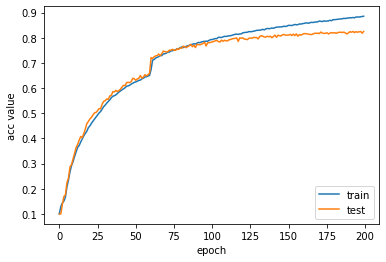

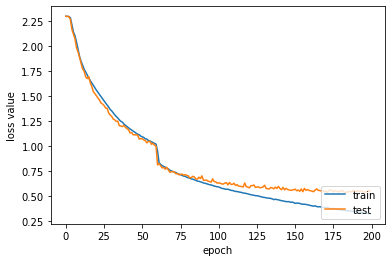

313/313 [==============================] - 4s 11ms/step - loss: 0.5514 - acc: 0.8246
Test acc: [0.5514468550682068, 0.8245999813079834]


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, Activation
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

batch_size = 128
learning_rate = 0.001
epoch_num = 200

def nin():
  """Define Network in Network model

  Returns:
    tf.keras.Model of NIN
  """
  input_tensor = Input(shape=(32, 32, 3))

  x = Conv2D(192, 5, activation='relu')(input_tensor)
  x = Conv2D(160, 1, activation='relu')(x)
  x = Conv2D(96, 1, activation='relu')(x)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  x = Dropout(0.5)(x)

  x = Conv2D(192, 5, activation='relu')(x)
  x = Conv2D(192, 1, activation='relu')(x)
  x = Conv2D(192, 1, activation='relu')(x)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  x = Dropout(0.5)(x)

  x = Conv2D(192, 3, activation='relu')(x)
  x = Conv2D(192, 1, activation='relu')(x)
  x = Conv2D(10, 1, activation='relu')(x)
  x = GlobalAveragePooling2D()(x)
  output_tensor = Activation('softmax', name="softmax_out")(x)

  return tf.keras.Model(input_tensor, output_tensor)

#get model
model = nin()
#train
sgd = optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['acc'])
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epoch_num, validation_data=(test_images, test_labels))
model.save('./cifar10_nin_200.h5')
#save accuracy image
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
#plt.title('Accuracy')
plt.ylabel('acc value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right'), plt.show()
fig.savefig('cifar10_accuracy_200.png')
fig2 = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right'), plt.show()
fig2.savefig('cifar10_loss_200.png')
reload_model = tf.keras.models.load_model('cifar10_nin_200.h5')

result = model.evaluate(test_images, test_labels)
print('Test acc:', result)

In [ ]:
from keras import models
from keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt

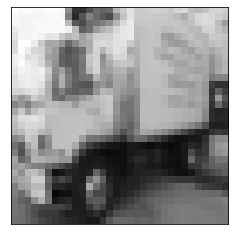


Predict ...
Complete!


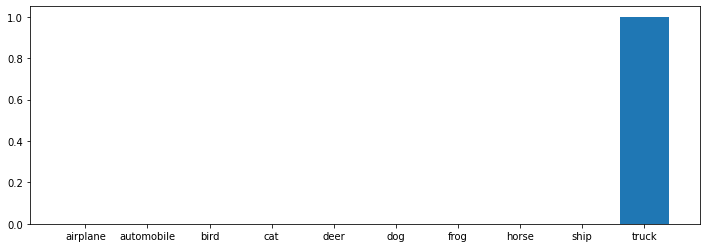

In [ ]:
classNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

model = tf.keras.models.load_model('cifar10_nin_200.h5')

# (1. 2. 3, 8. 9, 10, 11, 13, 151. 153, 154, 157)
index = 157

plt.xticks([])
plt.yticks([])
plt.imshow(testImages[int(index)])
plt.show()

print("\nPredict ...")
img = model.predict(testImages)
print("Complete!")

fig = plt.figure(figsize=(12, 4))
plt.bar(classNames, img[int(index)])
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 192)       14592     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 160)       30880     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 96)        15456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 96)        0         
                                                             